# Creating sample

In [36]:
# Import all the packages
from easyCore import np
from easyDiffractionLib.sample import Sample
from easyDiffractionLib import Site, Phase, Phases
from easyDiffractionLib.interface import InterfaceFactory as Calculator

from easyDiffractionLib.Elements.Experiments.Pattern import Pattern1D
from easyDiffractionLib.Profiles.P1D import Instrument1DCWParameters as Params

from easyCore.Fitting.Fitting import Fitter

import matplotlib.pyplot as plt

**Preparing the sample and data**

In [37]:
calculator = Calculator()
calculator.switch('CrysPy')

Create an atom

In [38]:
atom = Site.from_pars(label="Cl1",
                      specie='Cl',
                      fract_x=0.1250,
                      fract_y=0.1670,
                      fract_z=0.1070)
# atom.add_adp('Uiso', Uiso=0.0)

Create a phase

In [39]:
phase = Phase(name="p1")

# set the space group
phase.spacegroup.space_group_HM_name = "P 42/n c m"

# add the atom
phase.add_atom(atom)

Add another atom

In [40]:
phase.add_atom('Na1', 'Na', 0.5, 0.5, 0.5)

Visualise the structure

In [44]:
import py3Dmol
viewer2 = py3Dmol.view()
viewer2.addModel(phase.to_cif_str(),'cif',{'doAssembly':True,'duplicateAssemblyAtoms':True,'normalizeAssembly':True})
viewer2.setStyle({'sphere':{'colorscheme':'Jmol','scale':.2},'stick':{'colorscheme':'Jmol', 'radius': 0.1}})
viewer2.addUnitCell()
viewer2.replicateUnitCell(2,1,2)
#viewer2.setStyle({'sym':2},{'sphere':{'scale':.5,'color':'blue'},'stick':{'color':'cyan'}})
viewer2.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Create Phases object

In [45]:
phases = Phases()
phases.append(phase)

Create and modify a Parameters object

In [46]:
parameters = Params.default()
parameters.length_a = 8.56
parameters.length_c = 6.12
parameters.length_b = 8.56

Finally, create a Sample

In [47]:
S = Sample(phases=phases, parameters=parameters, calculator=calculator)

Temp CIF: C:\Users\PIOTRR~1\AppData\Local\Temp\easydiffraction_temp.cif
Several values of it_coordinate_system_code have been defined:
2, 1
The default value has been choosen:'2'.
Several values of it_coordinate_system_code have been defined:
2, 1
The default value has been choosen:'2'.


Calculate the profile

<IPython.core.display.Javascript object>


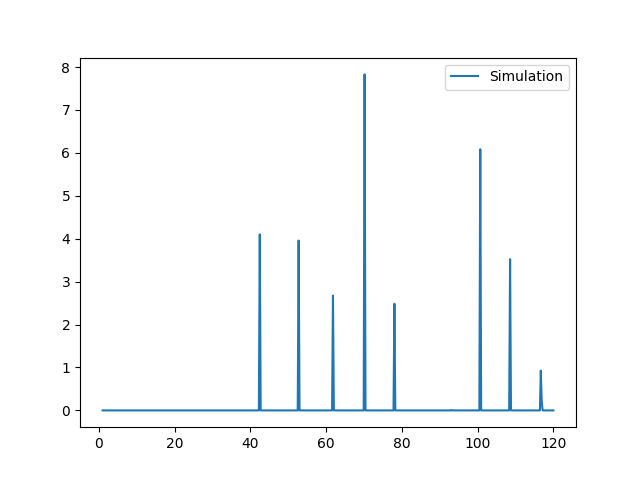

In [48]:
x_data = np.linspace(1, 120, 500)
y_data = calculator.fit_func(x_data)

%matplotlib notebook
plt.plot(x_data, y_data, label='Simulation')
plt.legend()

## Switch to TOF